# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [31]:

import tensorflow as tf #biblio pour machine learning and deep learning pour entrainement et prediction
import numpy as np #bibilio calcul scientifique python
import matplotlib.pyplot as plt #biblio pour la visualisation
print("Libraries imported successfully!")

Libraries imported successfully!


In [32]:
data_dir = 'data/dataset'
train_dir = 'data/dataset/Images/Train'
test_dir = 'data/dataset/Images/Test'

In [33]:
image_size = (180, 180) #Les modèles de deep learning nécessitent que toutes les images d'entrée aient la même dimension
batch_size = 32 #le nbr d'images traités simultanément pendant une étape d'entraînement
class_names = ['audi', 'lamborghini', 'mercedes']

In [34]:
from keras_preprocessing.image import ImageDataGenerator #transformations sur les images
#normalisation
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [35]:
#train_generator est un générateur qui charge les images depuis le rep train_dir 
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical' 
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'  
)

Found 64 images belonging to 3 classes.
Found 58 images belonging to 3 classes.


In [36]:
print("Training data shape:", train_generator.n, "images in", len(train_generator.class_indices), "classes.")
print("Test data shape:", test_generator.n, "images in", len(test_generator.class_indices), "classes.")

Training data shape: 64 images in 3 classes.
Test data shape: 58 images in 3 classes.


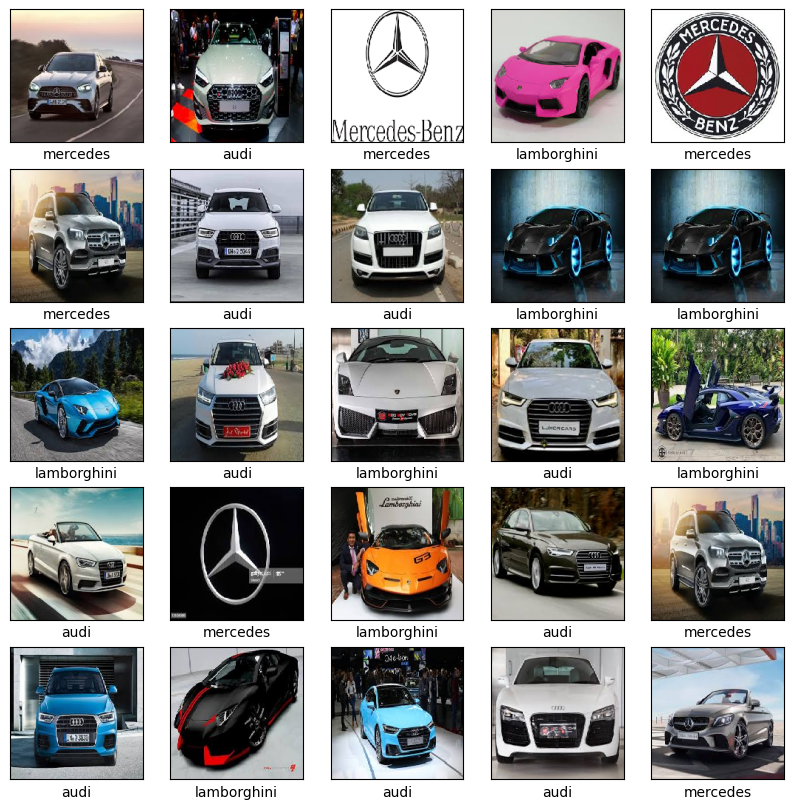

In [43]:
plt.figure(figsize=(10, 10)) #creation nv figure 10*10pouces
#loop to show 25img,5col 5lignes, indx commence par 1(matplotlib)

for i in range(25):
    plt.subplot(5, 5, i + 1)
    #Cela permet de ne pas afficher de valeurs sur les axes, car l'intérêt ici est d'afficher uniquement les images.
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    
    img, label = train_generator.next() # génère un lot d'images
    plt.imshow(img[0]) # shows the first img
    plt.xlabel(class_names[np.argmax(label[0])])  # Display the class name
plt.show()

In [44]:
#Crée un modèle séquentiel (architecture)
model = tf.keras.Sequential([
     tf.keras.layers.Rescaling(1.0 / 255.0), #normalisation
    tf.keras.layers.Flatten(input_shape=(image_size, 3)),  # Aplatir l'image (64x64x3 devient un vecteur 1D)
    tf.keras.layers.Dense(600, activation='relu'),  # Première couche dense, 600neurones
    # densément connectées ou entièrement connectées.
    #relu:fonction d'activation qui renvoie la valeur d'entrée si elle est positive, sinon elle renvoie zéro
    tf.keras.layers.Dropout(0.5),  # Pour éviter le sur-apprentissage
    #La couche de dropout désactive aléatoirement 50% des neurones pendant l'entraînement pour éviter le sur-apprentissage (overfitting)
    tf.keras.layers.Dense(600, activation='relu'),  # Deuxieme couche dense
    
    #softmax transforme les score en prob (exp)
    tf.keras.layers.Dense(len(class_names), activation='softmax')  # Couche de sortie
])

In [47]:
#compilation
#optimizer : ajuste les poids
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
#loss:fct de perte = compare les predictions du modele avec les vrais etiquette des classe, proportion de prédictions correctes



In [48]:
#traitement de 32 images par epoch 
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // batch_size,
                    validation_data=test_generator,
                    validation_steps=test_generator.samples // batch_size,
                    epochs=30) 

Epoch 1/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step - accuracy: 0.3516 - loss: 1.0968WARNING:tensorflow:5 out of the last 157 calls to <function TensorFlowTrainer._make_function.<locals>.multi_step_on_iterator at 0x00000262C88D3820> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 752ms/step - accuracy: 0.3438 - loss: 1.0991 - val_accuracy: 0.1562 - val_loss: 1.1331
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step - accuracy: 0.3646 - loss: 1.0711 - v

In [49]:
# Evaluate the model
#evaluate() permet de tester les performances du modèle 
#verbose:
#0 : Aucun affichage.
#1 : Affiche une barre de progression.
#2 : Affiche uniquement un résumé texte pour chaque batch.
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print('\nTest accuracy:', test_acc)

2/2 - 0s - 105ms/step - accuracy: 0.6724 - loss: 1.1558

Test accuracy: 0.6724137663841248


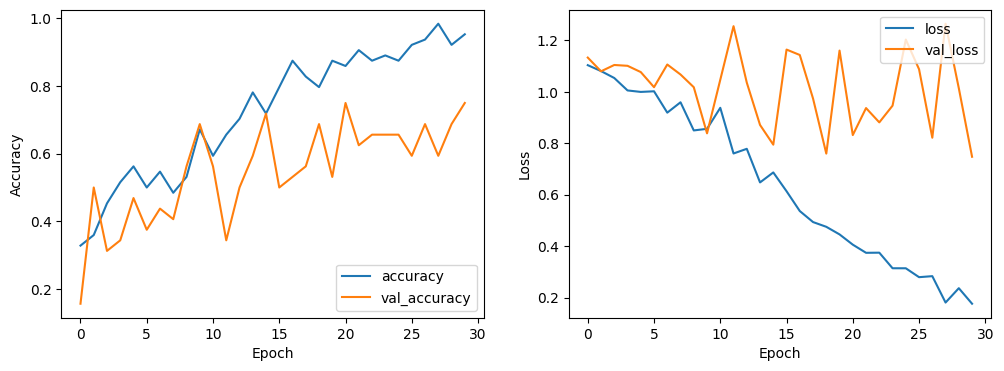

In [50]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1) #1ligne 2 colnn
plt.plot(history.history['accuracy'], label='accuracy') #train
plt.plot(history.history['val_accuracy'], label='val_accuracy')#val
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()